## Trabalho de Conclusão de Curso - PUC Minas
Curso: Inteligência Artificial e Aprendizado de Máquina

Tema: Predição de acidente vascular cerebral com base em fatores de risco.

Aluno. Luciano Barbosa da Silva

-------------------------------------------------------------------------------


### 1. Introdução 
O AVC é uma das principais causas de morte e incapacidade no mundo. Modificações no estilo de vida e medicação adequada podem prevenir ao menos 50% dos eventos de AVC. Este trabalho desenvolverá um modelo de aprendizado de máquina para prever o risco de AVC com base em fatores de risco. Serão abordadas técnicas de preparação de dados e análises exploratórias.
(Introdução completa consta no arquivo Word/PDF)

### 2. Descrição do Problema 
O objetivo deste trabalho é realizar o tratamento e a coleta de dados clínicos relevantes para a identificação do risco de AVC, e em seguida utilizar análises exploratórias e modelagem preditiva para prever esse risco. O trabalho tem como objetivo avaliar alguns modelos e sua eficácia na identificação precoce de pacientes com risco de AVC. 

Embora o trabalho não tenha sido elaborado para fins clínicos ou médicos, ele tem como propósito apresentar como a inteligência artificial e o aprendizado de máquina podem contribuir para a detecção de doenças e apoiar o direcionamento de esforços clínicos. 

Para garantir modelos preditivos eficazes, os dados clínicos serão tratados com cuidado. Isso envolve correção de erros, detecção de dados faltantes ou outliers e normalização de valores, se necessário. Somente após esse tratamento cuidadoso dos dados é possível construir modelos confiáveis para a identificação do risco de AVC.

-------------------------------------------------------------------------------
### 3. Coleta dos Dados

### Base de dados: Stroke Prediction Dataset
3.1
Fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<img src= "img/dataset-avc.jpg" style="width:480px;heght:324px">

-------------------------------------------------------------------------------

### 4. Processamento/Tratamento de Dados

#### 4.2 Bibliotecas utilizadas

In [1]:
import pandas as pd                                  # lib para manipução de dados
import numpy as np                                   # lib para processamento numérico.
import matplotlib.pyplot as plt                      # lib para utilização dos gráficos
import matplotlib.ticker as mtick                    # lib para formatar os valores exibidos nos eixos de um gráfico gerado pela biblioteca Matplotlib.
import seaborn as sns                                # lib para exibir dados estátisticos
import datetime                                      # lib para manipulação de datas
import os                                            # lib para manipulação de pastas e diretórios

from sklearn.model_selection import train_test_split # lib para dividir um conjunto de dados em treino e teste.
from sklearn.linear_model import LinearRegression    # lib para ajuste de um modelo de regressão linear
from sklearn.pipeline import Pipeline                # lib para construção de um pipeline que encapsula vários passos de processamento de dados e ajuste de modelo.
from sklearn.preprocessing import StandardScaler     # lib para normalização de atributos dos dados, para que eles tenham média zero e desvio padrão 1.
from sklearn.tree import DecisionTreeRegressor       # lib para ajuste de um modelo de regressão com uma árvore de decisão.

Em caso de erro no import das bibliotecas, efetuar instalação conforme comando abaixo. Ex: !pip install + "lib"

In [2]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn

#### 4.2.1 Importando o Dataset 

In [3]:
# Lendo o dataset e armazenando em um dataframe chamado df_stroke
path =r'data\healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(path)

In [4]:
# Selecionando os ultimos registros do dataframe para conferencia
df_stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### 4.2.2 Dimensão dos dados

Nesta etapa coseguimos avaliar o tamanho do dataset, todos os atributos e tipos de dados.



In [5]:
print("\nDimensões de Stroke Predition Dataset:\n{0}\n".format(df_stroke.shape))
print("\nCampos de Stroke Predition Dataset:\n{0}\n".format(list(df_stroke.keys())))
print("\nTipos dos dados:\n{0}\n".format(df_stroke.dtypes))


Dimensões de Stroke Predition Dataset:
(5110, 12)


Campos de Stroke Predition Dataset:
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


Tipos dos dados:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object



#### 4.3 Tratamento dos dados
Nesta seção, serão realizadas análises dos dados apresentados. A formatação dos dados será cuidadosamente verificada e serão aplicados filtros, se necessário, para assegurar a sua qualidade. Qualquer dado considerado desnecessário será devidamente excluído.

#### 4.3.1 Renomeando colunas

In [6]:
df_stroke.rename(
             {'gender':             'Genero',
             'age':                 'Idade',
             'hypertension':        'Hipertensao',
             'heart_disease':       'Doença_cardiaca',
             'ever_married':        'Ja_Casado',
             'work_type':           'Tipo_de_trabalho',
             'Residence_type':      'Tipo_de_residencia',
             'avg_glucose_level':   'Nivel_medio_glicose',
             'bmi':                 'IMC',
             'smoking_status':      'Condição_de_fumante',
             'stroke':              'AVC',
            }, 
            axis=1, inplace=True)

#### 4.3.2 Removendo colunas desnecessárias

O atributo ```ID``` é apenas uma chave primária para identificar um o paciente, não é relevante para o trabalho.

In [7]:
del df_stroke['id'] # Coluna Id - Identificador unico do paciente

#### 4.3.3 Padronizando os tipos das colunas

In [8]:
df_stroke["Idade"] = df_stroke["Idade"].astype(int)

#### 4.3.4 Tratamento de valores ausentes
O atribudo ```IMC``` contem ```201``` valores ausentes, no qual representa ```3,9%``` do total da base. 
Por se tratar de uma porcentagem baixa de dados ausentes em comparação com o total poderíamos eliminar essas 201 linhas, ou até mesmo substituir os dados ausentes por valores padrões ou médios, porém, como estamos tratando de dados clínicos talvez no "mundo real" essas práticas represente um enorme risco de erro em um diagnostico prevenido. 


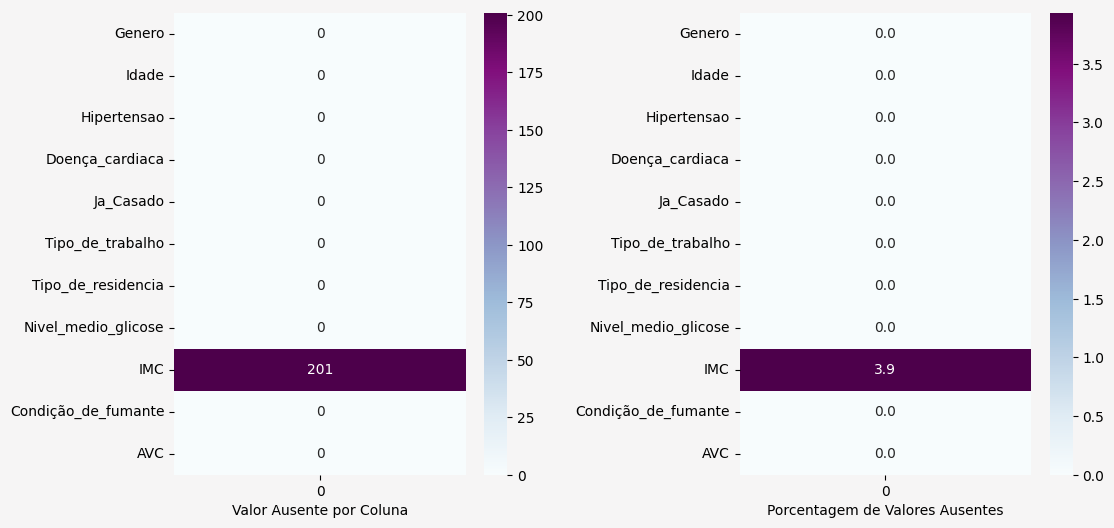

In [9]:
#Parametrização graficos
fig = plt.figure(figsize=(12, 6), dpi=100)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.55, hspace=0.5)

cor_fundo = '#f6f5f5'

fig.patch.set_facecolor(cor_fundo)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(cor_fundo)
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_facecolor(cor_fundo)

#grafico 1
ax = sns.heatmap(ax=ax0, data=df_stroke.isna().sum().to_frame(), annot=True, fmt='d', cmap='BuPu')
ax.set_xlabel('Valor Ausente por Coluna')

#grafico 2
# calcular a porcentagem de valores ausentes em cada coluna
missing_perc = df_stroke.isna().mean() * 100

# plotar o gráfico
ax = sns.heatmap(ax=ax1,data = missing_perc.to_frame(), annot=True, fmt='.1f', cmap='BuPu')
ax.set_xlabel('Porcentagem de Valores Ausentes')

plt.show()




Como alternativa para esse trabalho vamos optar por utilizar um modelo de ``árvore de decisão simples`` que, com base na idade e no sexo de todas as outras amostras dará uma previsão justa para os valores ausentes.



In [10]:
# Cria um pipeline para padronizar os recursos e ajustar um modelo de árvore de decisão
df_stroke_imc_pipe = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('lr', DecisionTreeRegressor(random_state=42))
])
# Seleciona as colunas relevantes do dataframe e codifica o Genero como valores numéricos
X = df_stroke[['Idade', 'Genero', 'IMC']].copy()
X['Genero'] = X['Genero'].replace({'Male': 0, 'Female': 1, 'Other': -1}).astype(int)

# Separa as amostras com valores de IMC faltantes
missing = X[X['IMC'].isna()]

# Ajusta o modelo com as amostras que têm valores de IMC
X = X[~X['IMC'].isna()]
Y = X.pop('IMC')
df_stroke_imc_pipe.fit(X, Y)

# Faz as previsões de IMC faltantes e preenche os valores previstos no dataframe original
predicted_imc = pd.Series(df_stroke_imc_pipe.predict(missing[['Idade', 'Genero']]), index=missing.index)
df_stroke.loc[missing.index, 'IMC'] = predicted_imc

#### 4.3.5 Informações do DataFrame final

In [11]:
# Datafram sem valores Ausente
df_stroke.isnull().sum()

Genero                 0
Idade                  0
Hipertensao            0
Doença_cardiaca        0
Ja_Casado              0
Tipo_de_trabalho       0
Tipo_de_residencia     0
Nivel_medio_glicose    0
IMC                    0
Condição_de_fumante    0
AVC                    0
dtype: int64

## 5. Análise e Exploração dos Dados 

### Estatística descritiva dos dados

Essas informações permitem obter uma visão geral sobre as características dos dados, como a variação, a distribuição e a centralidade. Além disso, o "describe()" também pode fornecer informações sobre as variáveis categóricas, como a contagem, o número de valores exclusivos (unique), o valor mais frequente (top) e a frequência do valor mais frequente (freq).
  
- O comando ``describe()`` exibe prioritariamente os campos numéricos. Os campos categóricos são exibidos isoladamente.


In [12]:
# Campos Numericos 
print("\nExibindo apenas os campos numéricos:\n{0}\n".format(df_stroke.describe()))

# Campos Categóricos 
categ = df_stroke.dtypes[df_stroke.dtypes == "object"].index
print("\nExibindo apenas os campos categóricos:\n{0}\n".format(df_stroke[categ].describe(), sep='\n'))



Exibindo apenas os campos numéricos:
             Idade  Hipertensao  Doença_cardiaca  Nivel_medio_glicose  \
count  5110.000000  5110.000000      5110.000000          5110.000000   
mean     43.215264     0.097456         0.054012           106.147677   
std      22.633866     0.296607         0.226063            45.283560   
min       0.000000     0.000000         0.000000            55.120000   
25%      25.000000     0.000000         0.000000            77.245000   
50%      45.000000     0.000000         0.000000            91.885000   
75%      61.000000     0.000000         0.000000           114.090000   
max      82.000000     1.000000         1.000000           271.740000   

               IMC          AVC  
count  5110.000000  5110.000000  
mean     28.919073     0.048728  
std       7.730623     0.215320  
min      10.300000     0.000000  
25%      23.700000     0.000000  
50%      28.300000     0.000000  
75%      32.900000     0.000000  
max      97.600000     1.000000 

#### 5.1.1 Quantificando volume de pacientes que tiveram AVC no cojunto de dados.


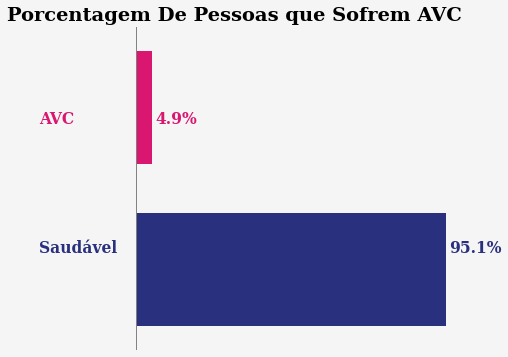

In [13]:

# calcular a porcentagem de observações com e sem AVC
avc_count = df_stroke['AVC'].value_counts()
avc_percent = 100 * avc_count / len(df_stroke)

# criar a figura e os eixos
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)

# criar fundo
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# plotar as barras
ax.barh([0], avc_percent[0], height=0.7, color='#29307d')
ax.barh([1], avc_percent[1], height=0.7, color='#d91770')

# adicionar os rótulos
plt.text(-30, 0.1, 'Saudável', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#29307d'})
plt.text(-30, 0.9, 'AVC', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#d91770'})
plt.text(avc_percent[0] + 1, 0.1, f'{avc_percent[0]:.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#29307d'})
plt.text(avc_percent[1] + 1, 0.9, f'{avc_percent[1]:.1f}%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': '#d91770'})

# configurar os eixos
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 1.5)
ax.axvline(x=0, color='gray', linewidth=1) 
ax.set_axis_off()

# adicionar o título
ax.set_title('Porcentagem De Pessoas que Sofrem AVC',font= 'Serif', fontsize=20, fontweight='bold',loc='right')

plt.show()


#### 5.1.2 Porcentagem casos de AVC por Genero

In [14]:
# Selecionar apenas casos de AVC
df_stroke_avc = df_stroke[df_stroke['AVC'] == 1]

# Contar o número de homens e mulheres com AVC
male_count = df_stroke_avc[df_stroke_avc['Genero'] == 'Male']['Genero'].count()
female_count = df_stroke_avc[df_stroke_avc['Genero'] == 'Female']['Genero'].count()

# Calcular a porcentagem de homens e mulheres com AVC
male_percentage = (male_count / df_stroke_avc['Genero'].count()) * 100
female_percentage = (female_count / df_stroke_avc['Genero'].count()) * 100

print(f"Porcentagem de Female com AVC: {female_percentage:.2f}%")
print(f"Porcentagem de Male com AVC: {male_percentage:.2f}%")


Porcentagem de Female com AVC: 56.63%
Porcentagem de Male com AVC: 43.37%


#### 5.1.3 Analise de distribuição dos atributos

Normalidade dos dados de Gênero por Idade

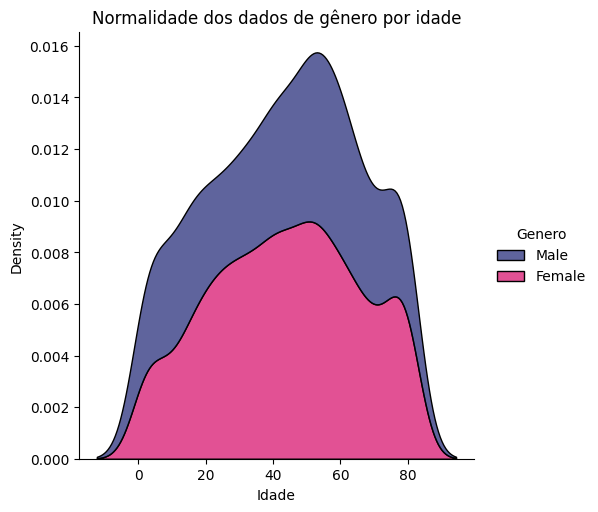

In [15]:

df_stroke_gender = df_stroke.loc[df_stroke['Genero'].isin(['Male', 'Female'])]
sns.displot(df_stroke_gender, x="Idade", hue="Genero", kind="kde", multiple='stack',palette=['#29307d','#d91770'])
plt.title("Normalidade dos dados de gênero por idade")
plt.show()

#### 5.1.3.1 Distribuição de AVC por Nível Médio de Glicose

C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3736739156.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3736739156.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')


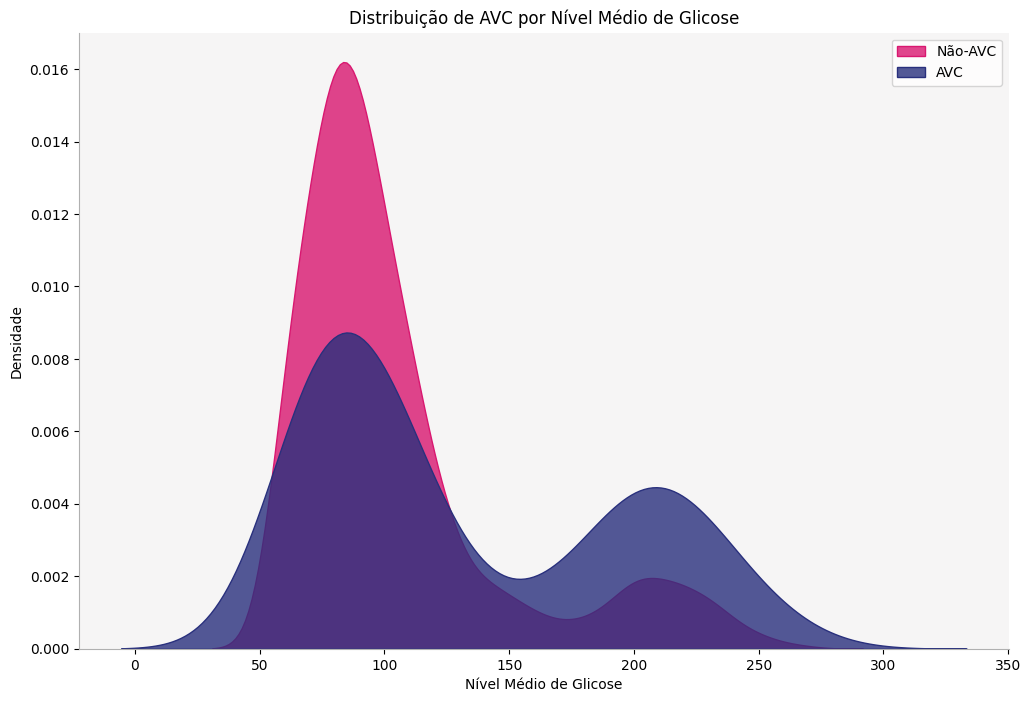

In [16]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='Nivel_medio_glicose', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('Nível Médio de Glicose')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por Nível Médio de Glicose')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()

#### 5.1.3.2. Distribuição de AVC por IMC

C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\914346703.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\914346703.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')


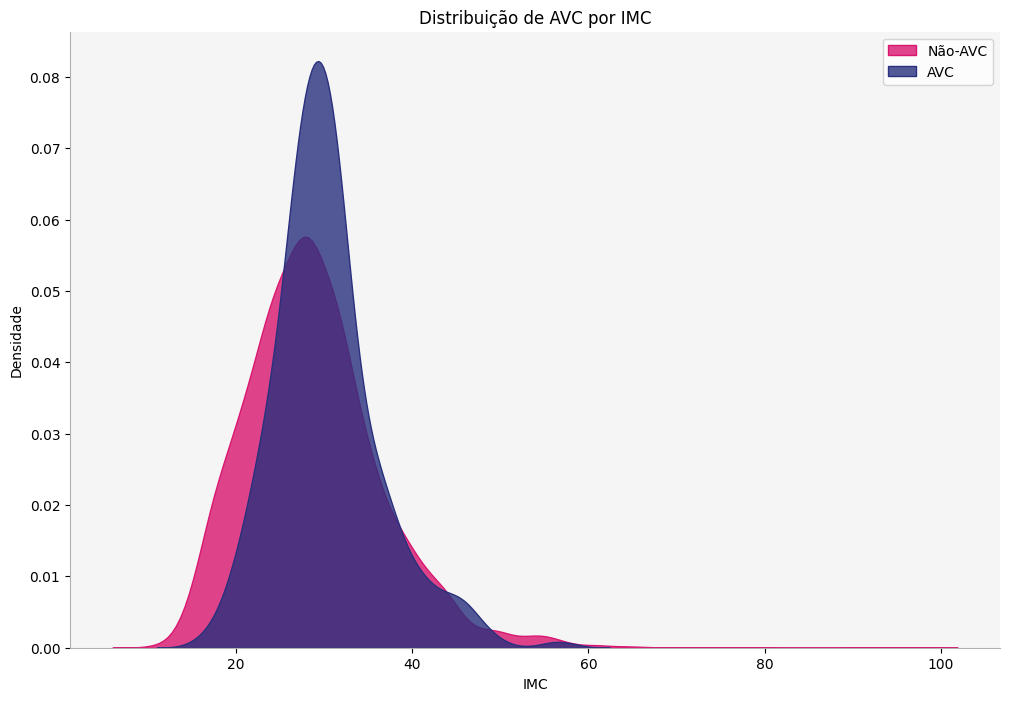

In [17]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='IMC', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('IMC')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por IMC')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()


#### 5.1.3.3.	Distribuição de AVC por Idade

C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3835388357.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3835388357.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')


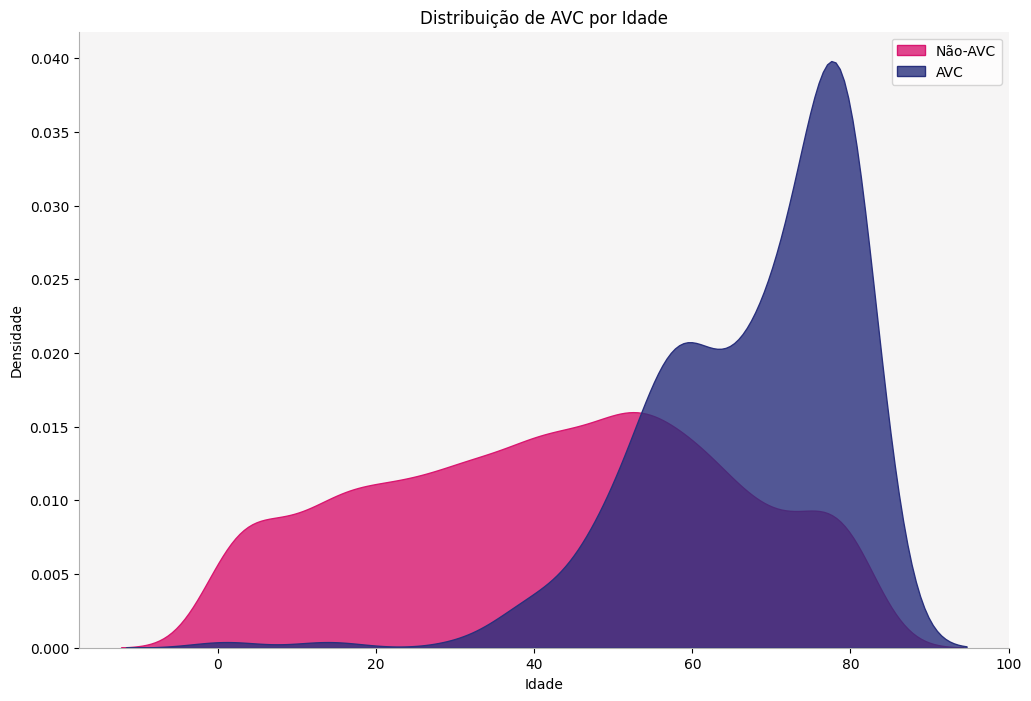

In [18]:
sns.set_palette(sns.color_palette(['#d91770','#29307d']))

fig, ax = plt.subplots(figsize=(12, 8))

sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 0], shade=True, ax=ax, alpha=0.8, label='Não-AVC')
sns.kdeplot(x='Idade', data=df_stroke[df_stroke['AVC'] == 1], shade=True, ax=ax, alpha=0.8, label='AVC')

plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.title('Distribuição de AVC por Idade')

ax.set_facecolor('#f6f5f5')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#b0b0b0')
ax.spines['left'].set_color('#b0b0b0')

plt.legend()
plt.show()


#### 5.2. Histórico de Doença Cardíaca e Hipertensão no conjunto de dados. 


In [19]:
# Função para calcular a porcentagem de Doença Cardiaca e Hipertensão
def stacked_bar(df, attr, label_attr, label1, label2, title, ax):
    positivo = pd.DataFrame(df[df[label_attr] == 1][attr].value_counts())
    positivo["Percentage"] = positivo[attr].apply(lambda x: x/sum(positivo[attr])*100)
    negativo = pd.DataFrame(df[df[label_attr] == 0][attr].value_counts())
    negativo["Percentage"] = negativo[attr].apply(lambda x: x/sum(negativo[attr])*100)

    # Definir configuração e cor das barras. 
    x = np.arange(len(positivo))
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    ax.bar(x, height=positivo["Percentage"], zorder=3, color="#29307d", width=0.4)
    ax.bar(x + 0.4, height=negativo["Percentage"], zorder=3, color="#d91770", width=0.4)
    ax.set_xticks(x + 0.2)
    ax.set_xticklabels([label1,label2])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(20))
    for i,j in zip(x, positivo["Percentage"]):
        ax.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f5f5', horizontalalignment='center', verticalalignment='center')
    for i,j in zip(x, negativo["Percentage"]):
        ax.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f5f5', horizontalalignment='center', verticalalignment='center')
    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

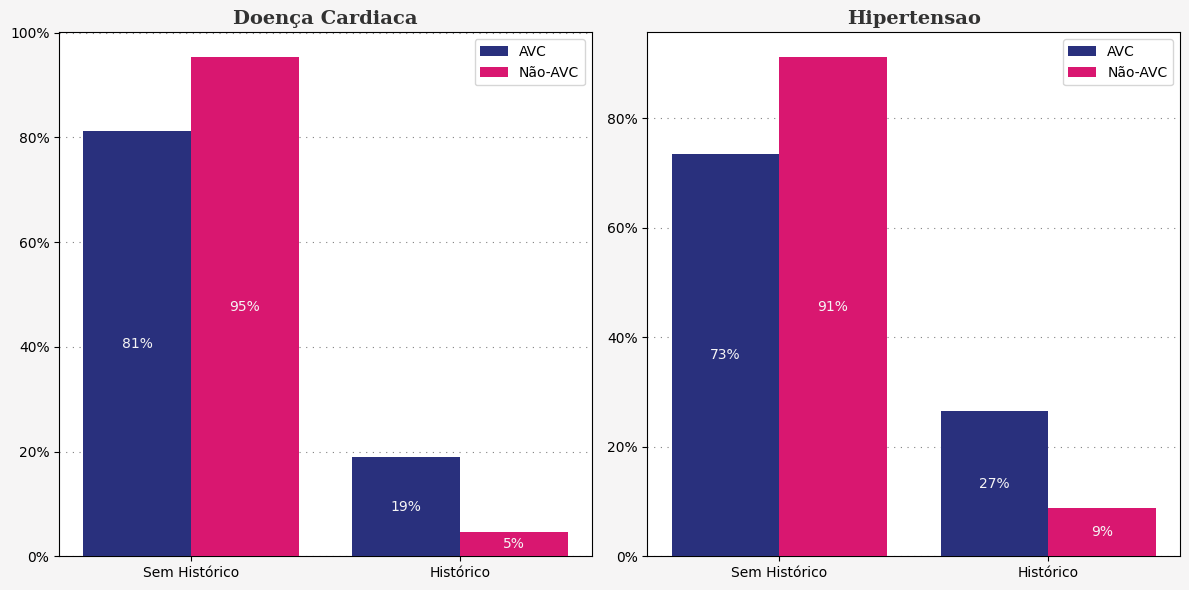

In [20]:
# Cor de fundo
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.patch.set_facecolor("#f6f5f5")

# Plotando o gráfico 
stacked_bar(df_stroke, "Doença_cardiaca", "AVC", "Sem Histórico", "Histórico", "Doença Cardiaca", ax=axs[0])
stacked_bar(df_stroke, "Hipertensao", "AVC", "Sem Histórico", "Histórico", "Hipertensao", ax=axs[1])

axs[0].legend(["AVC", "Não-AVC"], loc='upper right')
axs[1].legend(["AVC", "Não-AVC"], loc='upper right')

plt.tight_layout()
plt.show()



#### 5.3 Analise visual dos atributos Categóricos 

C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3677024756.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(n_avc.index)
C:\Users\Luciano Silva\AppData\Local\Temp\ipykernel_18408\3677024756.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(n_avc.index)


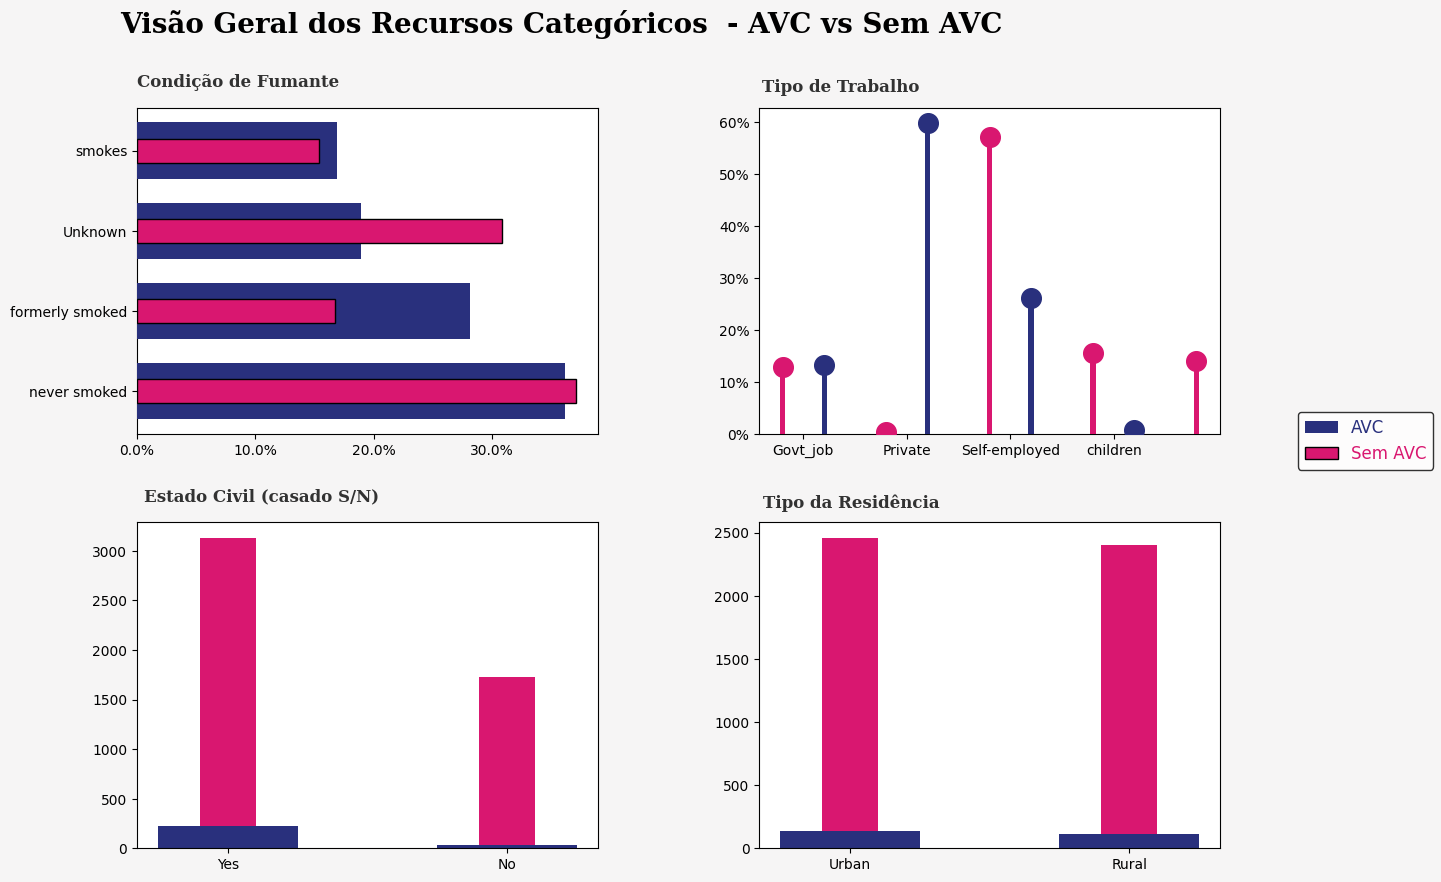

In [21]:
# Filtro Sim/Não AVC
s_avc = df_stroke[df_stroke['AVC'] == 1]
n_avc = df_stroke[df_stroke['AVC'] == 0]

# Deletando categoria 'Other' do atributo genero
n_avc = n_avc[(n_avc['Genero'] != 'Other')]

# Parametros de layout dos gráficos
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)

# Paleta de cor
N_AVC_cor = '#d91770'
AVC_cor = '#29307d'

# Posição de cada gráfico
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

fig.patch.set_facecolor(cor_fundo) # figure background color

# Gráficos
# Condição de Fumante
positivo = pd.DataFrame(s_avc["Condição_de_fumante"].value_counts())
positivo["Percentage"] = positivo["Condição_de_fumante"].apply(lambda x: x/sum(positivo["Condição_de_fumante"])*100)
negativo = pd.DataFrame(n_avc["Condição_de_fumante"].value_counts())
negativo["Percentage"] = negativo["Condição_de_fumante"].apply(lambda x: x/sum(negativo["Condição_de_fumante"])*100)

ax1.text(0, 3.8, 'Condição de Fumante', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positivo.index, positivo['Percentage'], color=AVC_cor, zorder=3, height=0.7)
ax1.barh(negativo.index, negativo['Percentage'], color=N_AVC_cor, zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

# Work Type
positivo = pd.DataFrame(s_avc["Tipo_de_trabalho"].value_counts())
positivo["Percentage"] = positivo["Tipo_de_trabalho"].apply(lambda x: x/sum(positivo["Tipo_de_trabalho"])*100)
positivo = positivo.sort_index()
negativo = pd.DataFrame(n_avc["Tipo_de_trabalho"].value_counts())
negativo["Percentage"] = negativo["Tipo_de_trabalho"].apply(lambda x: x/sum(negativo["Tipo_de_trabalho"])*100)
negativo = negativo.sort_index()

ax2.bar(negativo.index, height=negativo["Percentage"], zorder=3, color=N_AVC_cor, width=0.05)
ax2.scatter(negativo.index, negativo["Percentage"], zorder=3,s=200, color=N_AVC_cor)
ax2.bar(np.arange(len(positivo.index))+0.4, height=positivo["Percentage"], zorder=3, color=AVC_cor, width=0.05)
ax2.scatter(np.arange(len(positivo.index))+0.4, positivo["Percentage"], zorder=3,s=200, color=AVC_cor)

ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xticks(np.arange(len(positivo.index))+0.4 / 2)
ax2.set_xticklabels(list(positivo.index),rotation=0)
ax2.text(-0.2, 66, 'Tipo de Trabalho', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Já Se Casou?
s_avc = df_stroke[df_stroke['AVC'] == 1].Ja_Casado.value_counts()
n_avc = df_stroke[df_stroke['AVC'] == 0].Ja_Casado.value_counts()

ax3.bar( n_avc.index , height = n_avc.values, width = 0.2,color = N_AVC_cor)
ax3.bar( np.arange(len(s_avc.index)) , height = s_avc.values, width = 0.5,color= AVC_cor )
ax3.set_xticklabels(n_avc.index)
ax3.text(-0.3,3500, 'Estado Civil (casado S/N)', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Residence_type
s_avc = df_stroke[df_stroke['AVC'] == 1].Tipo_de_residencia.value_counts()
n_avc = df_stroke[df_stroke['AVC'] == 0].Tipo_de_residencia.value_counts()

ax4.bar( n_avc.index , height = n_avc.values, width = 0.2,color = N_AVC_cor)
ax4.bar( np.arange(len(s_avc.index)) , height = s_avc.values, width = 0.5,color= AVC_cor)
ax4.set_xticklabels(n_avc.index)
ax4.text(-0.31,2700, 'Tipo da Residência', fontsize=12, fontweight='bold', fontfamily='serif', color="#323232")

# Titulo
fig.text(0.4,0.93, 'Visão Geral dos Recursos Categóricos  - AVC vs Sem AVC', {'font':'Serif', 'color':'black','size':20, 'weight':'bold'})


# Legenda
leg = fig.legend(['AVC', 'Sem AVC'], loc='center right', fontsize=12, facecolor='white', edgecolor='black',
                 labelcolor=[AVC_cor, N_AVC_cor])

plt.show()



#### 5.3.1.	Matriz de Correlação  


Ajuste dos Atributos Categóricos

In [22]:
df_stroke['Genero'] = df_stroke['Genero'].map({'Male':0, 'Female':1})
df_stroke['Tipo_de_residencia'] = df_stroke['Tipo_de_residencia'].map({'Urban':0, 'Rural':1})
df_stroke['Condição_de_fumante'] = df_stroke['Condição_de_fumante'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df_stroke['Ja_Casado'] = df_stroke['Ja_Casado'].map({'Yes':0, 'No':1})
df_stroke['Tipo_de_trabalho'] = df_stroke['Tipo_de_trabalho'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

Conferindo se os atributos Categóricos foram ajustados para numéricos corretamento

In [23]:
df_stroke.tail()

,Genero,Idade,Hipertensao,Doença_cardiaca,Ja_Casado,Tipo_de_trabalho,Tipo_de_residencia,Nivel_medio_glicose,IMC,Condição_de_fumante,AVC
5105,1.0,80,1,0,0,0,0,83.75,28.476923,1,0
5106,1.0,81,0,0,0,1,0,125.20,40.000000,1,0
5107,1.0,35,0,0,0,1,1,82.99,30.600000,1,0
5108,0.0,51,0,0,0,0,1,166.29,25.600000,0,0
5109,1.0,44,0,0,0,2,0,85.28,26.200000,3,0


#### 5.3.1.1 Gráfico da Matriz de Correlação  

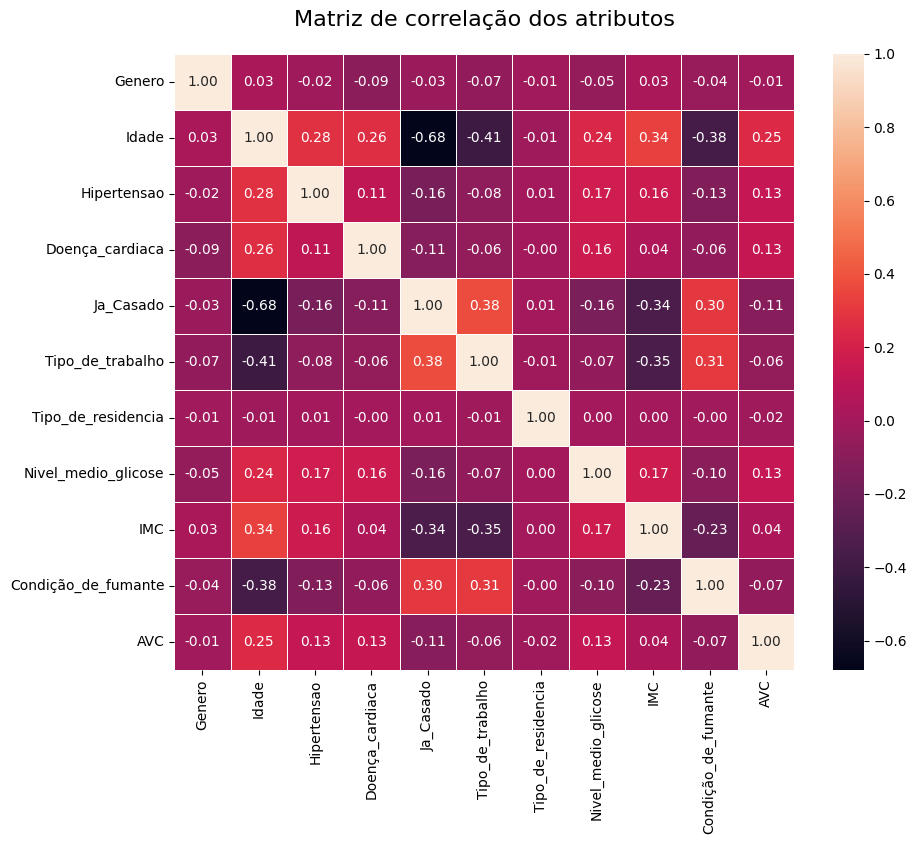

In [24]:
# Correlação dos dados
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_stroke.corr(), annot=True, linewidth=0.5, fmt='0.2f')
ax.set_title('Matriz de correlação dos atributos', fontsize=16, pad=20)
plt.show()



#### 5.3.1.2. Classificando a Matriz de Correlação  

In [25]:
# Gerando um dataframe para Classificação de Matrix de correlação
mat_corr = df_stroke.corr(method='pearson') 
corr_par = mat_corr.unstack()
corr_par


Genero  Genero                 1.000000
        Idade                  0.027855
        Hipertensao           -0.021223
        Doença_cardiaca       -0.085685
        Ja_Casado             -0.030171
                                 ...   
AVC     Tipo_de_residencia    -0.015458
        Nivel_medio_glicose    0.131945
        IMC                    0.041458
        Condição_de_fumante   -0.066393
        AVC                    1.000000
Length: 121, dtype: float64

In [26]:
# Ordenando valores da Matrix de correlação
par_sorted = corr_par.sort_values(kind="quicksort")
print(par_sorted)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Tipo_de_trabalho     Idade                 -0.413852
Idade                Tipo_de_trabalho      -0.413852
                     Condição_de_fumante   -0.376142
                                              ...   
Doença_cardiaca      Doença_cardiaca        1.000000
Hipertensao          Hipertensao            1.000000
Idade                Idade                  1.000000
Condição_de_fumante  Condição_de_fumante    1.000000
AVC                  AVC                    1.000000
Length: 121, dtype: float64


#### 5.3.1.3 Correlação Negativa  
Valores negativos 

In [27]:
# Imprimindo somente correlações negativas 
par_corr_negativos = par_sorted[par_sorted < 0]
print(par_corr_negativos)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Tipo_de_trabalho     Idade                 -0.413852
Idade                Tipo_de_trabalho      -0.413852
                     Condição_de_fumante   -0.376142
                                              ...   
Tipo_de_residencia   Genero                -0.006105
                     Condição_de_fumante   -0.004656
Condição_de_fumante  Tipo_de_residencia    -0.004656
Doença_cardiaca      Tipo_de_residencia    -0.003092
Tipo_de_residencia   Doença_cardiaca       -0.003092
Length: 62, dtype: float64


#### 5.3.1.4 Seleção de Correlação Forte (magnitude 0,5)

In [28]:
par_corr_forte = par_sorted[abs(par_sorted) > 0.5]
print(par_corr_forte)


Ja_Casado            Idade                 -0.679181
Idade                Ja_Casado             -0.679181
Genero               Genero                 1.000000
Tipo_de_trabalho     Tipo_de_trabalho       1.000000
IMC                  IMC                    1.000000
Nivel_medio_glicose  Nivel_medio_glicose    1.000000
Tipo_de_residencia   Tipo_de_residencia     1.000000
Ja_Casado            Ja_Casado              1.000000
Doença_cardiaca      Doença_cardiaca        1.000000
Hipertensao          Hipertensao            1.000000
Idade                Idade                  1.000000
Condição_de_fumante  Condição_de_fumante    1.000000
AVC                  AVC                    1.000000
dtype: float64


Por fim, analisamos a correlação entre o AVC e as demais variáveis do conjunto de dados, mas a correlação perfeita da variável "AVC" consigo mesma não possibilitou identificar relações com outras variáveis. Essa análise é relevante para criar modelos de aprendizado de máquina, e técnicas serão apresentadas na próxima sessão para melhorar a precisão do modelo de predição de AVC com base em fatores de risco.

In [29]:
avc_corr_forte = mat_corr["AVC"][abs(mat_corr["AVC"]) > 0.5]
print(avc_corr_forte)


AVC    1.0
Name: AVC, dtype: float64


#### 5.3.2	Assimetria dos atributos

In [30]:
# Assimetria e ordenação dos resultados
df_stroke.skew().sort_values(kind="quicksort")


Genero                -0.349410
Idade                 -0.140425
Tipo_de_residencia     0.032107
Condição_de_fumante    0.077863
Ja_Casado              0.657745
Tipo_de_trabalho       0.972287
IMC                    1.048490
Nivel_medio_glicose    1.572284
Hipertensao            2.715392
Doença_cardiaca        3.947244
AVC                    4.193284
dtype: float64

#### 5.3.2.1 Representação Gráfica da Assimetria dos Atributos

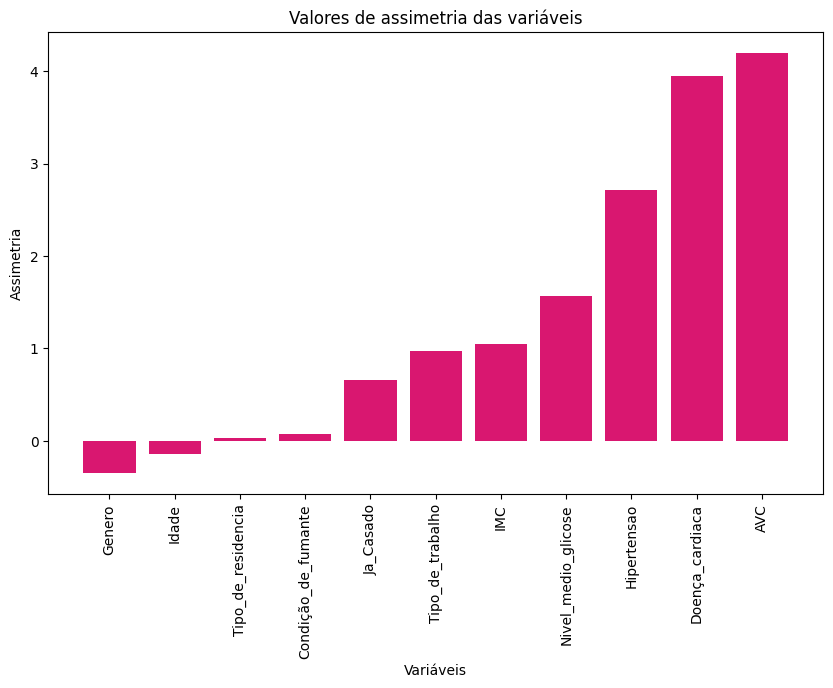

In [31]:

# Calcular os valores de assimetria das variáveis
skewness = df_stroke.skew().sort_values(kind="quicksort")

# Criar um gráfico de barras verticais
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(skewness.index, skewness.values)

# Adicionar rótulos e título
ax.set_xlabel('Variáveis')
ax.set_ylabel('Assimetria')
ax.set_title('Valores de assimetria das variáveis')
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()
